In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This magic command ensures that plots appear inside the notebook
%matplotlib inline

# Importing models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

In [146]:
attritionDb = pd.read_csv(r'C:\Users\smo2020\Downloads\Clicked_DataSprint\Clicked Attrition logistic regression analysis.csv')

In [147]:
attritionDb.head()

,Age,Attrition,business Travel,Deparment,Gender,Marital Status,Monthly Income,Num Companies Worked,Percent Salary Hike,Stock Option Level,Total Working Years,Training Times Last Year,Years At Company,Job Involvement
0,51,0,1,1,1,2,131160,1,11,0,1,6,1,3
1,31,1,2,2,1,0,41890,0,23,1,6,3,5,2
2,32,0,2,2,0,2,193280,1,15,3,5,2,5,3
3,38,0,0,2,0,2,83210,3,11,3,13,5,8,2
4,32,0,1,2,0,0,23420,4,12,2,9,2,6,3


In [148]:
attritionDb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       4410 non-null   int64
 1   Attrition                 4410 non-null   int64
 2   business Travel           4410 non-null   int64
 3   Deparment                 4410 non-null   int64
 4   Gender                    4410 non-null   int64
 5   Marital Status            4410 non-null   int64
 6   Monthly Income            4410 non-null   int64
 7   Num Companies Worked      4410 non-null   int64
 8   Percent Salary Hike       4410 non-null   int64
 9   Stock Option Level        4410 non-null   int64
 10  Total Working Years       4410 non-null   int64
 11  Training Times Last Year  4410 non-null   int64
 12  Years At Company          4410 non-null   int64
 13  Job Involvement           4410 non-null   int64
dtypes: int64(14)
memory usage: 482.5 KB


In [149]:
pd.crosstab(attritionDb.Attrition,attritionDb.Gender)

Gender,0,1
Attrition,,
0,2205,1494
1,441,270


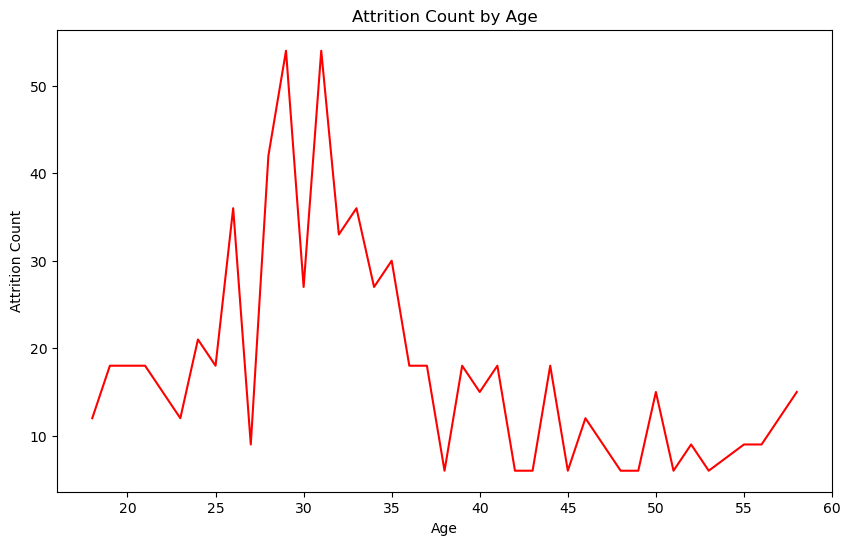

In [150]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming attritionDb DataFrame is already loaded with the necessary columns

# Filter data for attrition (1 for yes)
attrition_cases = attritionDb[attritionDb['Attrition'] == 1]

# Group data by age and calculate the count of attrition cases
attrition_count_by_age = attrition_cases.groupby('Age').size().reset_index(name='Attrition Count')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot a line chart
sns.lineplot(data=attrition_count_by_age, x='Age', y='Attrition Count', color='red')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Attrition Count')
plt.title('Attrition Count by Age')

# Show the plot
plt.show()




<Figure size 800x600 with 0 Axes>

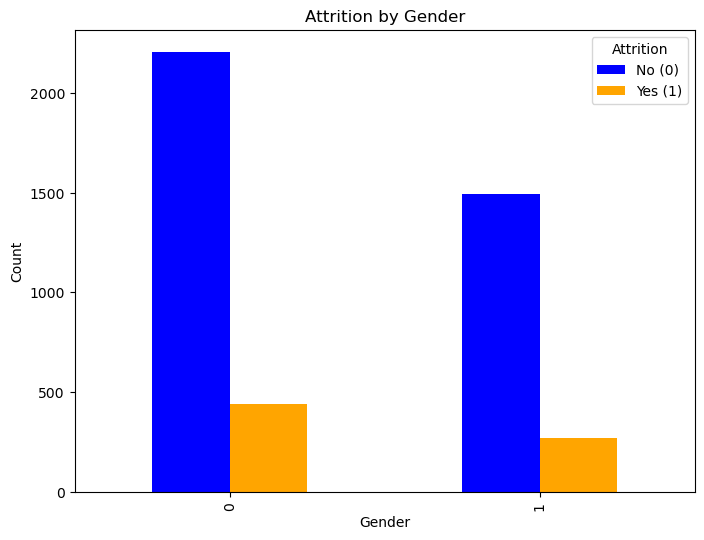

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the attritionDb DataFrame is already loaded with the necessary columns

# Generate the cross-tabulation of attrition and gender
gender_attrition_crosstab = pd.crosstab(attritionDb.Attrition, attritionDb.Gender)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a grouped bar chart
gender_attrition_crosstab.T.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Attrition by Gender')

# Add a legend to clarify the Attrition (0 and 1)
plt.legend(title='Attrition', labels=['No (0)', 'Yes (1)'])

# Show the plot
plt.show()


In [152]:
# what around 95 prediction if some has heart disease or not based on the features 
# split data into x and y 
x = attritionDb.drop("Attrition", axis =1)
y = attritionDb["Attrition"]

In [153]:
x

,Age,business Travel,Deparment,Gender,Marital Status,Monthly Income,Num Companies Worked,Percent Salary Hike,Stock Option Level,Total Working Years,Training Times Last Year,Years At Company,Job Involvement
0,51,1,1,1,2,131160,1,11,0,1,6,1,3
1,31,2,2,1,0,41890,0,23,1,6,3,5,2
2,32,2,2,0,2,193280,1,15,3,5,2,5,3
3,38,0,2,0,2,83210,3,11,3,13,5,8,2
4,32,1,2,0,0,23420,4,12,2,9,2,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,1,2,1,0,60290,3,17,1,10,5,3,3
4406,29,1,2,0,1,26790,2,15,0,10,2,3,2
4407,25,1,2,0,2,37020,0,20,0,5,4,4,3
4408,42,1,1,0,1,23980,0,14,1,10,2,9,2


In [154]:
y

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: Attrition, Length: 4410, dtype: int64

In [155]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define models in a dictionary
models = {
    "logistic regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "random forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    
    models : dict
        A dictionary of different scikit-learn machine learning models.
    x_train : array-like
        Training data (no labels).
    x_test : array-like
        Testing data (no labels).
    y_train : array-like
        Training labels.
    y_test : array-like
        Testing labels.
        
    Returns:
        model_scores : dict
            A dictionary with model names as keys and their scores as values.
    '''
    # Set random seed
    np.random.seed(42)
    
    # Create a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the training data
        model.fit(x_train, y_train)
        # Evaluate the model on the testing data and store the score
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores

In [156]:
model_scores = fit_and_score(models = models, 
                                x_train = x_train,
                                x_test = x_test, 
                                y_train = y_train, 
                                y_test = y_test)
model_scores

{'logistic regression': 0.8401360544217688,
 'KNN': 0.8140589569160998,
 'random forest': 0.9931972789115646}

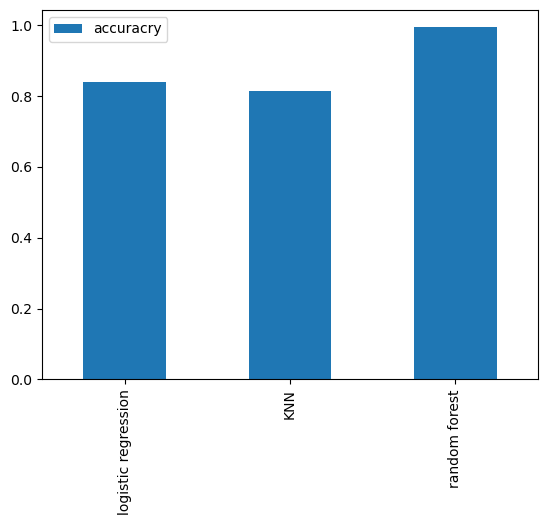

In [157]:
model_compare = pd.DataFrame(model_scores, index=["accuracry"])
model_compare.T.plot.bar();

In [158]:
attritionDb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       4410 non-null   int64
 1   Attrition                 4410 non-null   int64
 2   business Travel           4410 non-null   int64
 3   Deparment                 4410 non-null   int64
 4   Gender                    4410 non-null   int64
 5   Marital Status            4410 non-null   int64
 6   Monthly Income            4410 non-null   int64
 7   Num Companies Worked      4410 non-null   int64
 8   Percent Salary Hike       4410 non-null   int64
 9   Stock Option Level        4410 non-null   int64
 10  Total Working Years       4410 non-null   int64
 11  Training Times Last Year  4410 non-null   int64
 12  Years At Company          4410 non-null   int64
 13  Job Involvement           4410 non-null   int64
dtypes: int64(14)
memory usage: 482.5 KB


In [159]:

# Separate the features (X) and target (y)
X = attritionDb[['Age', 'business Travel ', 'Deparment', 'Gender', 'Marital Status', 
                 'Monthly Income', 'Num Companies Worked', 'Percent Salary Hike', 
                 'Stock Option Level', 'Total Working Years', 'Training Times Last Year', 
                 'Years At Company', 'Job Involvement']]

# Replace 'Attrition' with your target column
y = attritionDb['Attrition']


In [160]:
print(attritionDb.columns)


Index(['Age', 'Attrition', 'business Travel ', 'Deparment', 'Gender',
       'Marital Status', 'Monthly Income', 'Num Companies Worked',
       'Percent Salary Hike', 'Stock Option Level', 'Total Working Years',
       'Training Times Last Year', 'Years At Company', 'Job Involvement'],
      dtype='object')


In [161]:
# Set a random seed for reproducibility
np.random.seed(42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [162]:
# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

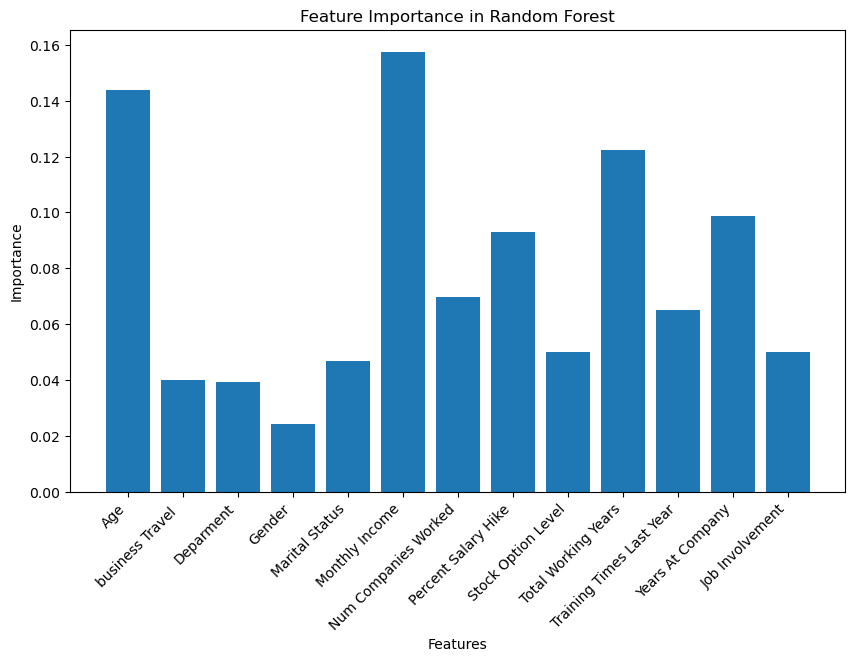

In [163]:
# Retrieve the feature importance from the model
feature_importance = rf_model.feature_importances_

# Plot the feature importance
features = X.columns
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()


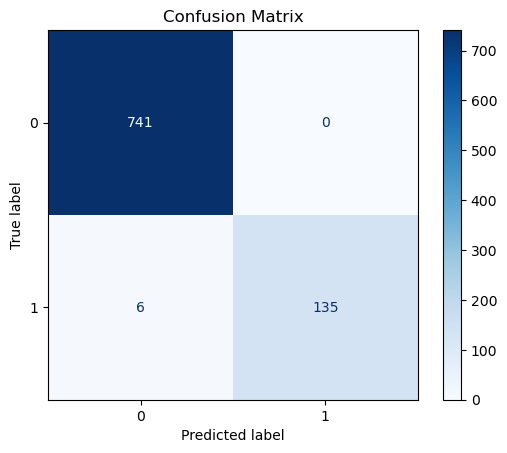

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as  plt

# Predict on the test set
y_pred = rf_model.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


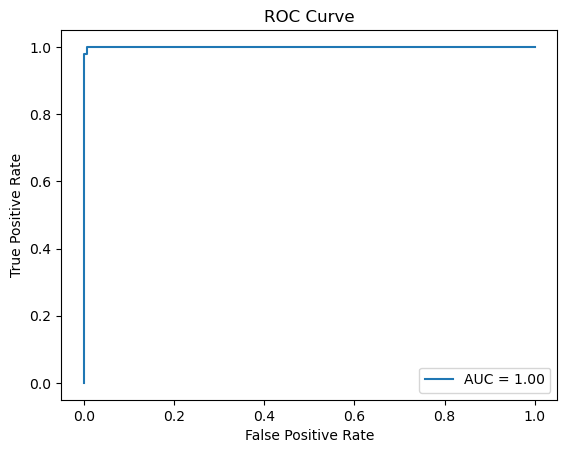

In [165]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
auc_score = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [175]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
auc_score = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])

# Print AUC score
print(f"AUC Score: {auc_score:.2f}")

# Print False Positive Rate (FPR), True Positive Rate (TPR), and Thresholds
print("False Positive Rate (FPR):")
print(fpr)
print("\nTrue Positive Rate (TPR):")
print(tpr)
print("\nThresholds:")
print(thresholds)


AUC Score: 1.00
False Positive Rate (FPR):
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00404858 0.00674764 0.00674764 0.00944669
 0.01349528 0.01619433 0.02968961 0.0391363  0.04453441 0.04723347
 0.048583   0.06072874 0.07557355 0.09446694 0.12280702 0.14439946
 0.18218623 0.21727395 0.26585695 0.35492578 0.49527665 0.63022942
 0.83535762 1.        ]

True Positive Rate (TPR):
[0.         0.0070922  0.04255319 0.05673759 0.07801418 0.12056738
 0.17730496 0.26241135 0.32624113 0.43971631 0.5106383  0.54609929
 0.56737589 0.65248227 0.66666667 0.67375887 0.71631206 0.73049645
 0.78723404 0.80141844 0.82978723 0.90070922 0.92198582 0.95035461
 0.95744681 0.9787234  0.9787234  0.9787234  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.  

In [166]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = rf_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [168]:
# Split the data into features (X) and target (y)
X = attritionDb.drop(columns=['Attrition'])
y = attritionDb['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [169]:
# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       741
           1       0.71      0.07      0.13       141

    accuracy                           0.85       882
   macro avg       0.78      0.53      0.52       882
weighted avg       0.83      0.85      0.79       882



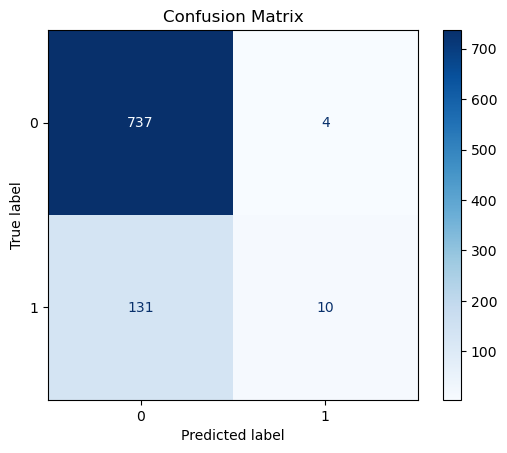

In [170]:
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [171]:
from sklearn.metrics import accuracy_score

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f'Accuracy Score: {accuracy:.4f}')


Accuracy Score: 0.8469


In [172]:

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data into a DataFrame (assuming 'attritionDb' is the DataFrame)
# and set the target and features
X = attritionDb.drop('Attrition', axis=1)
y = attritionDb['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Get the coefficients and intercept
coefficients = model.coef_[0]  # Model coefficients
intercept = model.intercept_  # Model intercept

# Create a feature report
feature_names = X.columns
feature_report = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
# Display the feature report
print("Feature Report:")
print(feature_report)

# Evaluate the model on the testing set
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = (y_pred == y_test).mean()
print(f'\nAccuracy: {accuracy:.4f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Feature Report:
                     Feature  Coefficient
0                        Age    -0.259059
1           business Travel      0.351884
2                  Deparment    -0.083963
3                     Gender    -0.042400
4             Marital Status    -0.371249
5             Monthly Income    -0.050277
6       Num Companies Worked     0.284884
7        Percent Salary Hike     0.012366
8         Stock Option Level    -0.049198
9        Total Working Years    -0.454088
10  Training Times Last Year    -0.178045
11          Years At Company    -0.164848
12           Job Involvement    -0.011375

Accuracy: 0.8469

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       741
           1       0.71      0.07      0.13       141

    accuracy                           0.85       882
   macro avg       0.78      0.53      0.52       882
weighted avg       0.83      0.85      0.79       882


Confusion Matrix:
[[737   

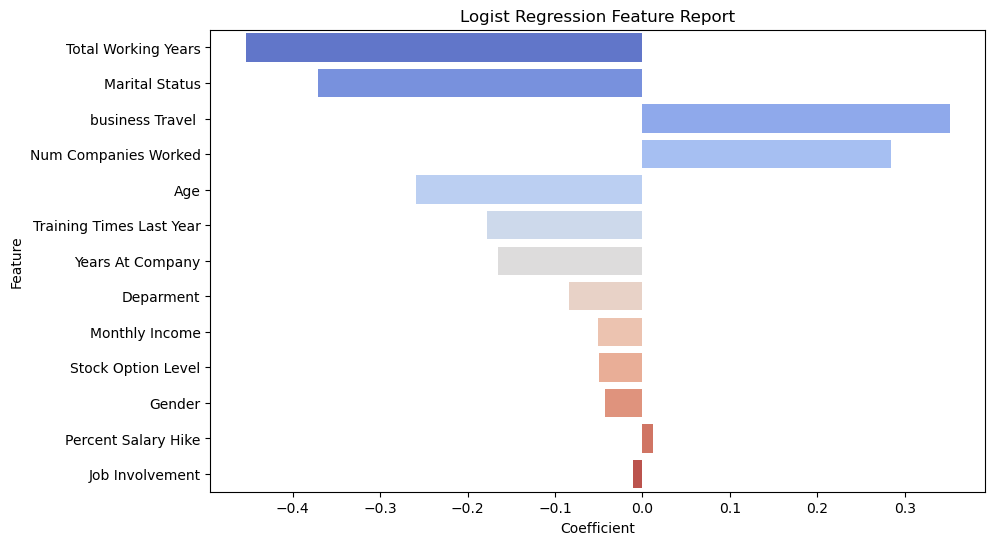

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming the attritionDb DataFrame is already loaded with the necessary columns

# Split the data into features (X) and target (y)
X = attritionDb.drop(columns=['Attrition'])
y = attritionDb['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

# Get feature coefficients from the trained model
feature_names = X.columns
coefficients = log_reg_model.coef_.flatten()

# Create a DataFrame with feature names and coefficients
feature_report_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by absolute coefficient values (for better visualization)
feature_report_df = feature_report_df.reindex(
    feature_report_df['Coefficient'].abs().sort_values(ascending=False).index
)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar chart
sns.barplot(x='Coefficient', y='Feature', data=feature_report_df, palette='coolwarm')

# Set labels and title
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logist Regression Feature Report')

# Show the plot
plt.show()


In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming you have already trained and evaluated the models

# Calculate ROC curves and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Print classification reports
print('Logistic Regression Classification Report:')
print(classification_report(y_test, lr_model.predict(X_test_scaled)))

print('Random Forest Classification Report:')
print(classification_report(y_test, rf_model.predict(X_test_scaled)))

# Plot confusion matrices
confusion_lr = confusion_matrix(y_test, lr_model.predict(X_test_scaled))
confusion_rf = confusion_matrix(y_test, rf_model.predict(X_test_scaled))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(confusion_lr, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(confusion_rf, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Confusion Matrix')

plt.show()


NameError: name 'lr_model' is not defined